In [1]:
require 'matplotlib/iruby'
Matplotlib::IRuby.activate

require 'pycall/import'
include PyCall::Import

pyimport :pandas, as: :pd
pyimport :seaborn, as: :sns

:sns

In [2]:
require 'benchmark'

true

In [3]:
n = 100_000
trials = 100
array = Array.new(n) { rand }
enum = array.each
method = []
runtime = []

[]

In [4]:
# Array#sum
trials.times do
  method << 'array.sum'
  runtime << Benchmark.realtime { array.sum }
end

100

In [5]:
# Array#sum
trials.times do
  method << 'enum.sum'
  runtime << Benchmark.realtime { enum.sum }
end

100

In [6]:
# Array#inject
trials.times do
  method << 'array.inject'
  runtime << Benchmark.realtime { array.inject :+ }
end

100

In [7]:
# Enumerable#inject
trials.times do
  method << 'enum.inject'
  runtime << Benchmark.realtime { enum.inject :+ }
end

100

In [8]:
# while
def while_sum(array)
  sum, i, cnt = 0, 0, array.length
  while i < cnt
    sum += array[i]
    i += 1
  end
  sum
end

trials.times do
  method << 'while'
  runtime << Benchmark.realtime { while_sum(array) }
end

100

In [9]:
df = pd.DataFrame.({method: method, runtime: runtime}, {})  # The last empty hash is for empty kwargs
df.groupby.('method').describe.()

                       runtime
method                        
array.inject count  100.000000
             mean     0.003378
             std      0.000597
             min      0.002945
             25%      0.003054
             50%      0.003156
             75%      0.003540
             max      0.007732
array.sum    count  100.000000
             mean     0.000686
             std      0.000185
             min      0.000502
             25%      0.000557
             50%      0.000644
             75%      0.000763
             max      0.001398
enum.inject  count  100.000000
             mean     0.005062
             std      0.001402
             min      0.004181
             25%      0.004265
             50%      0.004588
             75%      0.005379
             max      0.012665
enum.sum     count  100.000000
             mean     0.001550
             std      0.000634
             min      0.001276
             25%      0.001300
             50%      0.001389
        

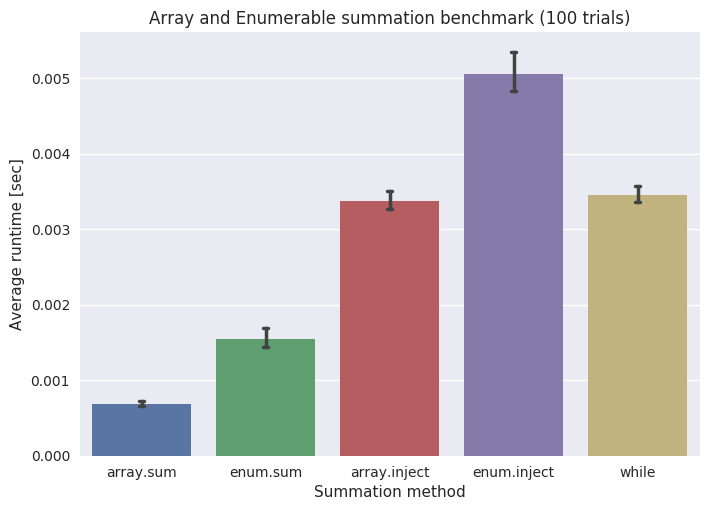

In [10]:
sns.barplot.(x: 'method', y: 'runtime', data: df, errwidth: 2.5, capsize: 0.04)
plt = Matplotlib::Pyplot
plt.title("Array and Enumerable summation benchmark (#{trials} trials)")
plt.xlabel("Summation method")
plt.ylabel("Average runtime [sec]")